In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
os.getcwd()
dd = pd.read_csv("SAheart.txt")
def add_intercept(x):
    return np.hstack([np.ones([x.shape[0],1]), x])

In [30]:
## need response as a matrix
tmat = dd.tobacco.to_numpy()[:,np.newaxis]
tmat.shape

(462, 1)

In [3]:
dd.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LogisticRegression

In [19]:
model = make_pipeline(
    ## include_bias = True is default; 
     SplineTransformer(n_knots=5, degree=3, include_bias = True), 
     LogisticRegression(penalty=None)
)
model.fit(tmat, dd.chd)
xrange = np.arange(min(dd.tobacco), max(dd.tobacco), step = 1)
y_pred = model.predict_proba(xrange[:,np.newaxis])

In [26]:
# get spline transform from pipeline
splines = model.named_steps["splinetransformer"]
spline_transform = splines.transform(xrange[:,np.newaxis])
## H = add_intercept(spline_transform)  ## don't do it! intercept already included
H = spline_transform
# columns of y_pred are p and (1-p) respectively
W = np.diag(y_pred[:,0] * y_pred[:,1])
cov = np.linalg.inv(H.T @ W @ H)
variance = np.diag(cov)

(32, 7)

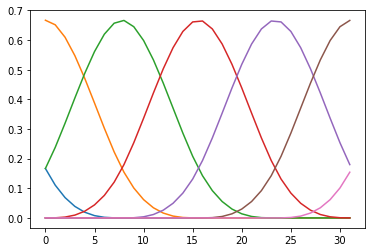

In [42]:
plt.plot(H);
H.shape

It's not at all obvious (i.e. there's not something like a column of all ones), but the default B-spline basis that `sklearn` sets up implictly includes an intercept (called a 'bias term' in this case)

(32, 6)

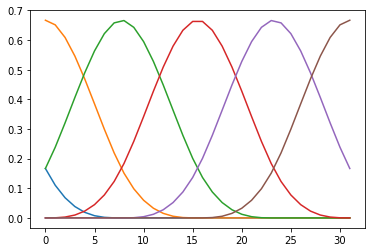

In [43]:
H_noint = SplineTransformer(n_knots = 5, degree = 3, include_bias = False).fit_transform(xrange[:, np.newaxis])
plt.plot(H_noint);
H_noint.shape

In [33]:
## what happens if we add an intercept?
H_aug = add_intercept(spline_transform)
print(H_aug.shape)
np.linalg.matrix_rank(H_aug)
## uh-oh ...

(32, 8)


7

In [28]:
variance

array([7.48836483e+02, 2.70044191e+01, 9.32942355e+00, 1.29770304e+01,
       7.57107660e+01, 1.25374993e+04, 6.13484413e+16])